In [3]:
import pandas as pd
import numpy as np

In [500]:
#read data
df = pd.read_csv("D:/data1030/project/ML_data.csv")
#print(df.shape)
#print(df.head(20))
# df = df[10:]
#df.set_index('date', inplace=True)
print(df.shape)
print(df.head())
# df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

(633, 34)
         date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
0  1971-01-01  358.0200     NaN     NaN     NaN     NaN     NaN     NaN   
1  1971-02-01  357.5450     NaN     NaN     NaN     NaN     NaN     NaN   
2  1971-03-01  357.5187     NaN     NaN     NaN     NaN     NaN     NaN   
3  1971-04-01  357.5032     NaN     NaN     NaN     NaN     NaN     NaN   
4  1971-05-01  357.4130     NaN     NaN     NaN     NaN     NaN     NaN   

   ExLag7  ExLag8  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  \
0     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

   R2Lag7  R2Lag8  R2Lag9  R2Lag10  
0     NaN     NaN     NaN      NaN  
1     NaN     NaN   

In [501]:
#check if there is any missing data
perc_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

frac_missing = sum(df.isnull().sum(axis = 1) != 0 )/ df.shape[0]
print('fraction of points with missing values:')
print(frac_missing)

fraction of missing values in features:
ExLag1     0.015798
ExLag2     0.015798
ExLag3     0.015798
ExLag4     0.015798
ExLag5     0.015798
ExLag6     0.015798
ExLag7     0.015798
ExLag8     0.015798
ExLag9     0.015798
ExLag10    0.015798
R1Lag1     0.015798
R1Lag2     0.015798
R1Lag3     0.015798
R1Lag4     0.015798
R1Lag5     0.015798
R1Lag6     0.015798
R1Lag7     0.015798
R1Lag8     0.015798
R1Lag9     0.015798
R1Lag10    0.015798
R2         0.121643
R2Lag1     0.137441
R2Lag2     0.137441
R2Lag3     0.137441
R2Lag4     0.137441
R2Lag5     0.137441
R2Lag6     0.137441
R2Lag7     0.137441
R2Lag8     0.137441
R2Lag9     0.137441
R2Lag10    0.137441
dtype: float64
fraction of points with missing values:
0.13744075829383887


In [502]:
#check if the data is correct
print(df[df['Ex']>360].any().any())
print(df[df['Ex']<70].any().any())
print(df[df['R1']<0].any().any())
print(df[df['R2']<0].any().any())

False
False
False
False


In [503]:
print(df['Ex'].describe())

count    633.000000
mean     156.705209
std       70.992032
min       76.643000
25%      108.068500
50%      121.635000
75%      216.285200
max      358.020000
Name: Ex, dtype: float64


Text(0, 0.5, 'Count')

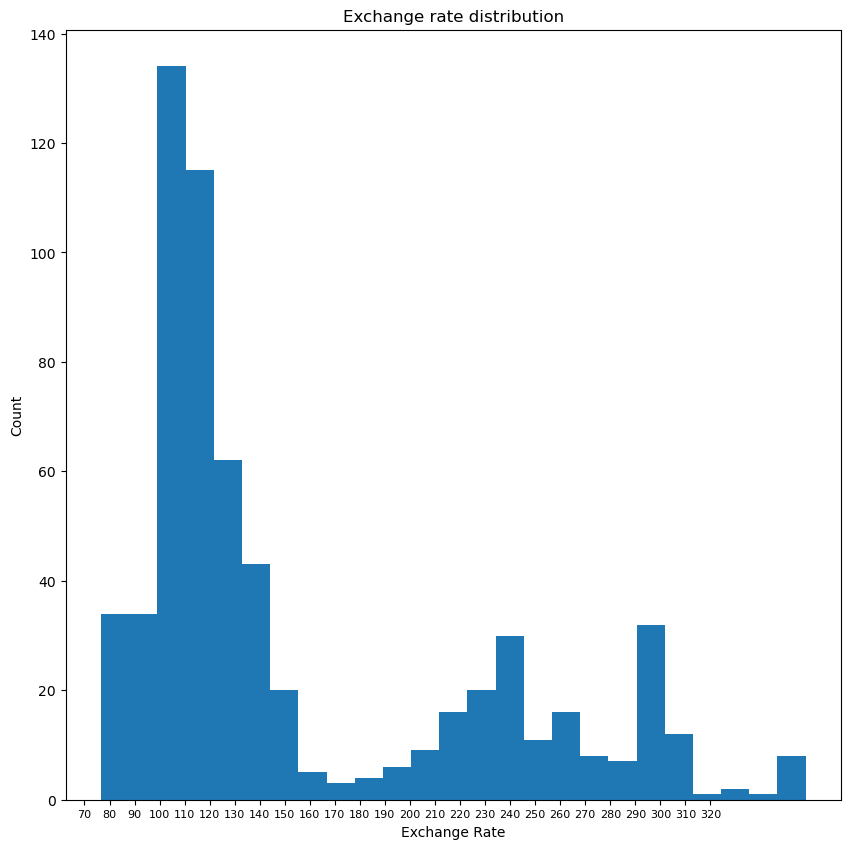

In [504]:
import matplotlib 
from matplotlib import pylab as plt

plt.figure(figsize = (10,10))


df['Ex'].plot.hist(bins = int(np.sqrt(df.shape[0])))
x_ticks_labels = [10*i for i in range (7,33)]
plt.title('Exchange rate distribution')
plt.xticks(x_ticks_labels,fontsize = 8)
plt.xlabel('Exchange Rate')
plt.ylabel('Count')

([<matplotlib.axis.XTick at 0x1f0217d4dd0>,
 [Text(0, 0, '1971-01-01'),
  Text(24, 0, '1973-01-01'),
  Text(48, 0, '1975-01-01'),
  Text(72, 0, '1977-01-01'),
  Text(96, 0, '1979-01-01'),
  Text(120, 0, '1981-01-01'),
  Text(144, 0, '1983-01-01'),
  Text(168, 0, '1985-01-01'),
  Text(192, 0, '1987-01-01'),
  Text(216, 0, '1989-01-01'),
  Text(240, 0, '1991-01-01'),
  Text(264, 0, '1993-01-01'),
  Text(288, 0, '1995-01-01'),
  Text(312, 0, '1997-01-01'),
  Text(336, 0, '1999-01-01'),
  Text(360, 0, '2001-01-01'),
  Text(384, 0, '2003-01-01'),
  Text(408, 0, '2005-01-01'),
  Text(432, 0, '2007-01-01'),
  Text(456, 0, '2009-01-01'),
  Text(480, 0, '2011-01-01'),
  Text(504, 0, '2013-01-01'),
  Text(528, 0, '2015-01-01'),
  Text(552, 0, '2017-01-01'),
  Text(576, 0, '2019-01-01'),
  Text(600, 0, '2021-01-01'),
  Text(624, 0, '2023-01-01')])

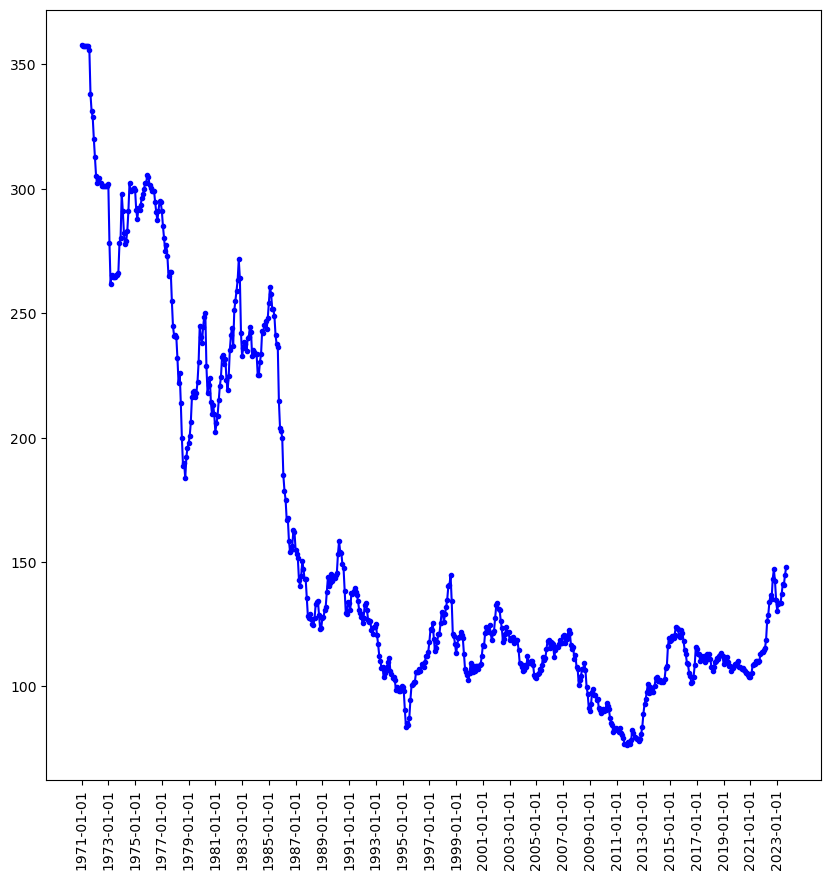

In [505]:
from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize = (10,10))
plt.plot( df['date'],df['Ex'], label='Exchange rate trend', color='blue', marker='o', markersize=3)

plt.xticks(np.arange(len(df['date']))[::24],df['date'].iloc[::24],rotation = 90)






(441, 34)


([<matplotlib.axis.XTick at 0x1f023b50290>,
 [Text(0, 0, '1987-01-01'),
  Text(24, 0, '1989-01-01'),
  Text(48, 0, '1991-01-01'),
  Text(72, 0, '1993-01-01'),
  Text(96, 0, '1995-01-01'),
  Text(120, 0, '1997-01-01'),
  Text(144, 0, '1999-01-01'),
  Text(168, 0, '2001-01-01'),
  Text(192, 0, '2003-01-01'),
  Text(216, 0, '2005-01-01'),
  Text(240, 0, '2007-01-01'),
  Text(264, 0, '2009-01-01'),
  Text(288, 0, '2011-01-01'),
  Text(312, 0, '2013-01-01'),
  Text(336, 0, '2015-01-01'),
  Text(360, 0, '2017-01-01'),
  Text(384, 0, '2019-01-01'),
  Text(408, 0, '2021-01-01'),
  Text(432, 0, '2023-01-01')])

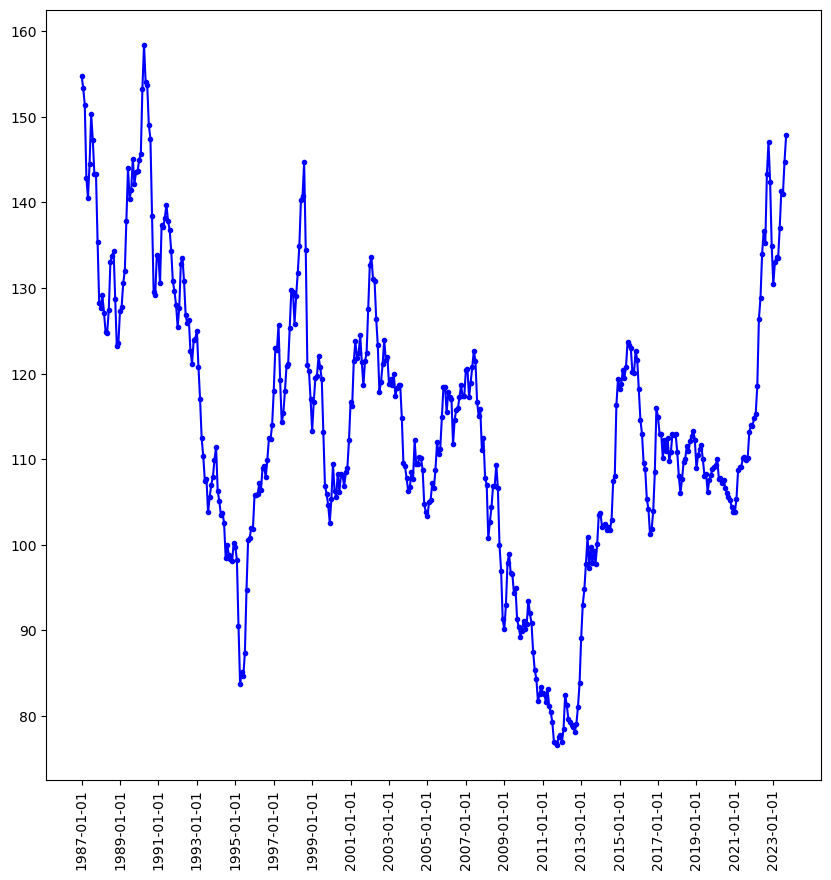

In [506]:
df87 = df[192:]
print(df87.shape)

plt.figure(figsize = (10,10))
plt.plot( df87['date'],df87['Ex'], label='Exchange rate trend', color='blue', marker='o', markersize=3)

plt.xticks(np.arange(len(df87['date']))[::24],df87['date'].iloc[::24],rotation = 90)

In [507]:
dataR = pd.melt(df, id_vars=['date'], value_vars=['R1', 'R2'])#, ignore_index=False)
dfR = pd.DataFrame(dataR)
print(dfR.dtypes)
dfR['variable'] = dfR['variable'].astype('category')
dfR['date'] = pd.to_datetime(dfR['date'])
dfR['variable'] = dfR['variable'].cat.codes

print(dfR.dtypes)

date         object
variable     object
value       float64
dtype: object
date        datetime64[ns]
variable              int8
value              float64
dtype: object


In [508]:
print(dfR['variable'].unique())

[0 1]


In [509]:
from ydata_profiling.visualisation.plot import timeseries_heatmap

timeseries_heatmap(dataframe=dfR, entity_column='variable', sortby='date')

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:

plt.figure(figsize=(10, 10))

#dfT = df
#dfT.set_index('date', inplace=True)

# Set the size of the plot
plt.figure(figsize=(15, 10))  # Width=10 inches, Height=6 inches

# Create the primary Y-axis and plot R1
ax1 = plt.gca()
dfT["R1"].plot(ax=ax1, label='Interest rate of USA')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot R2 on the secondary Y-axis
dfT["R2"].plot(ax=ax2, style="g", label='Interest rate of JP')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('Date')

ax1.set_ylabel('Interest rate of USA')
ax2.set_ylabel('Interest rate of JP')

plt.title('Time Series Plot')
plt.xticks(np.arange(len(df['date']))[::60],df['date'].iloc[::60],rotation = 45)
plt.show()

In [ ]:
df.plot.scatter('Ex','R1', figsize = (10,10))
plt.show()

In [ ]:
df87.plot.scatter('Ex','R1', figsize = (10,10))
plt.show()

In [ ]:
df.plot.scatter('Ex','R2', figsize = (10,10))
plt.show()
print(df['R2'].value_counts())

In [ ]:
df87.plot.scatter('Ex','R2', figsize = (10,10))
plt.show()
print(df87['R2'].value_counts())

In [ ]:
ordinal = [0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.75, 1.0, 1.75, 2.5, 3.0, 3.25, 3.75, 4.25, 4.5, 5.0, 5.25, 5.5, 6.0]
dataset = []
for i in ordinal:
    Ex_value = df87[df87['R2'] == i]['Ex'].values
    dataset.append(Ex_value)
    
positions = list(range(1, len(ordinal) + 1))
xticks = ordinal
plt.figure(figsize = (10,10))
plt.boxplot(dataset)
plt.ylabel('Exchange Rate')
plt.xlabel('Interest Rate')
plt.xticks(positions,xticks)
plt.title('Relationship between Exchang Rate and Interest Rate')
# caption = '''houses with the overall condition rating of 5 have the highest median price(outliers excluded), 
#                                   as well as the most outliers'''
# plt.text(0.05, -0.1, caption,transform=plt.gca().transAxes, fontsize=12, color='grey')
plt.show()

In [ ]:
import matplotlib 
from matplotlib import pylab as plt
import numpy as np
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate')
axes[0,0].set_ylabel('Exchange Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate')
axes[0,1].set_ylabel('Exchange Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate')
axes[0,2].set_ylabel('Exchange Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Exchange Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate')
axes[1,1].set_ylabel('Exchange Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate')
axes[1,2].set_ylabel('Exchange Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate')
axes[2,0].set_ylabel('Exchange Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate')
axes[2,1].set_ylabel('Exchange Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate')
axes[2,2].set_ylabel('Exchange Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)



Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate')

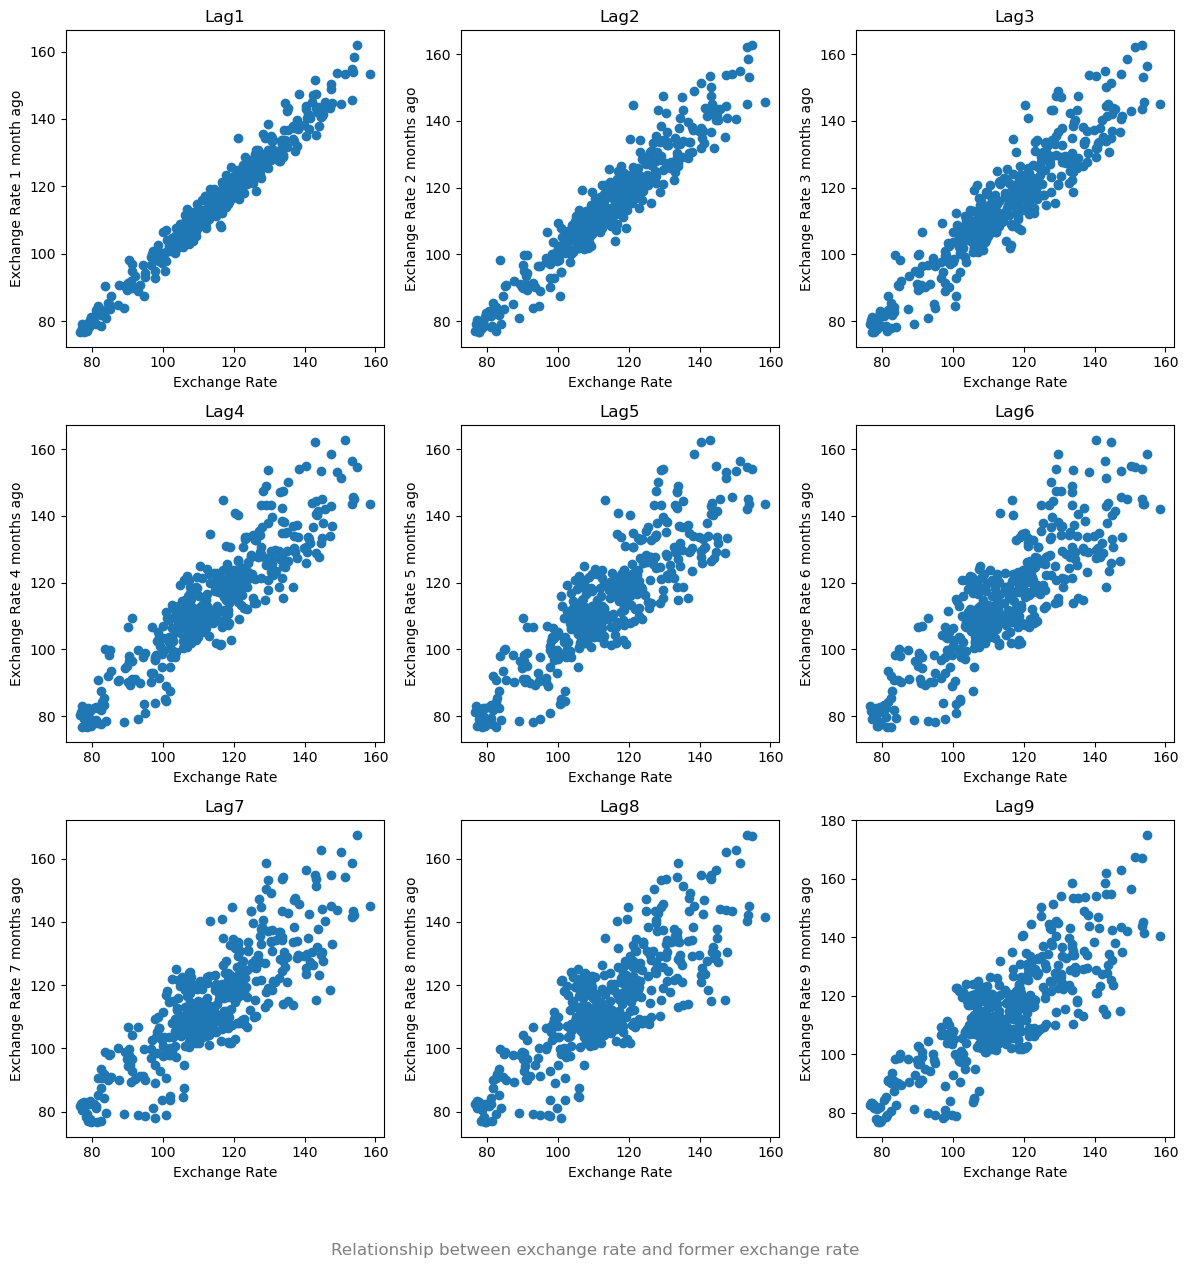

In [510]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate')
axes[0,0].set_ylabel('Exchange Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate')
axes[0,1].set_ylabel('Exchange Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate')
axes[0,2].set_ylabel('Exchange Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Exchange Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate')
axes[1,1].set_ylabel('Exchange Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate')
axes[1,2].set_ylabel('Exchange Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate')
axes[2,0].set_ylabel('Exchange Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate')
axes[2,1].set_ylabel('Exchange Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate')
axes[2,2].set_ylabel('Exchange Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate of USA')

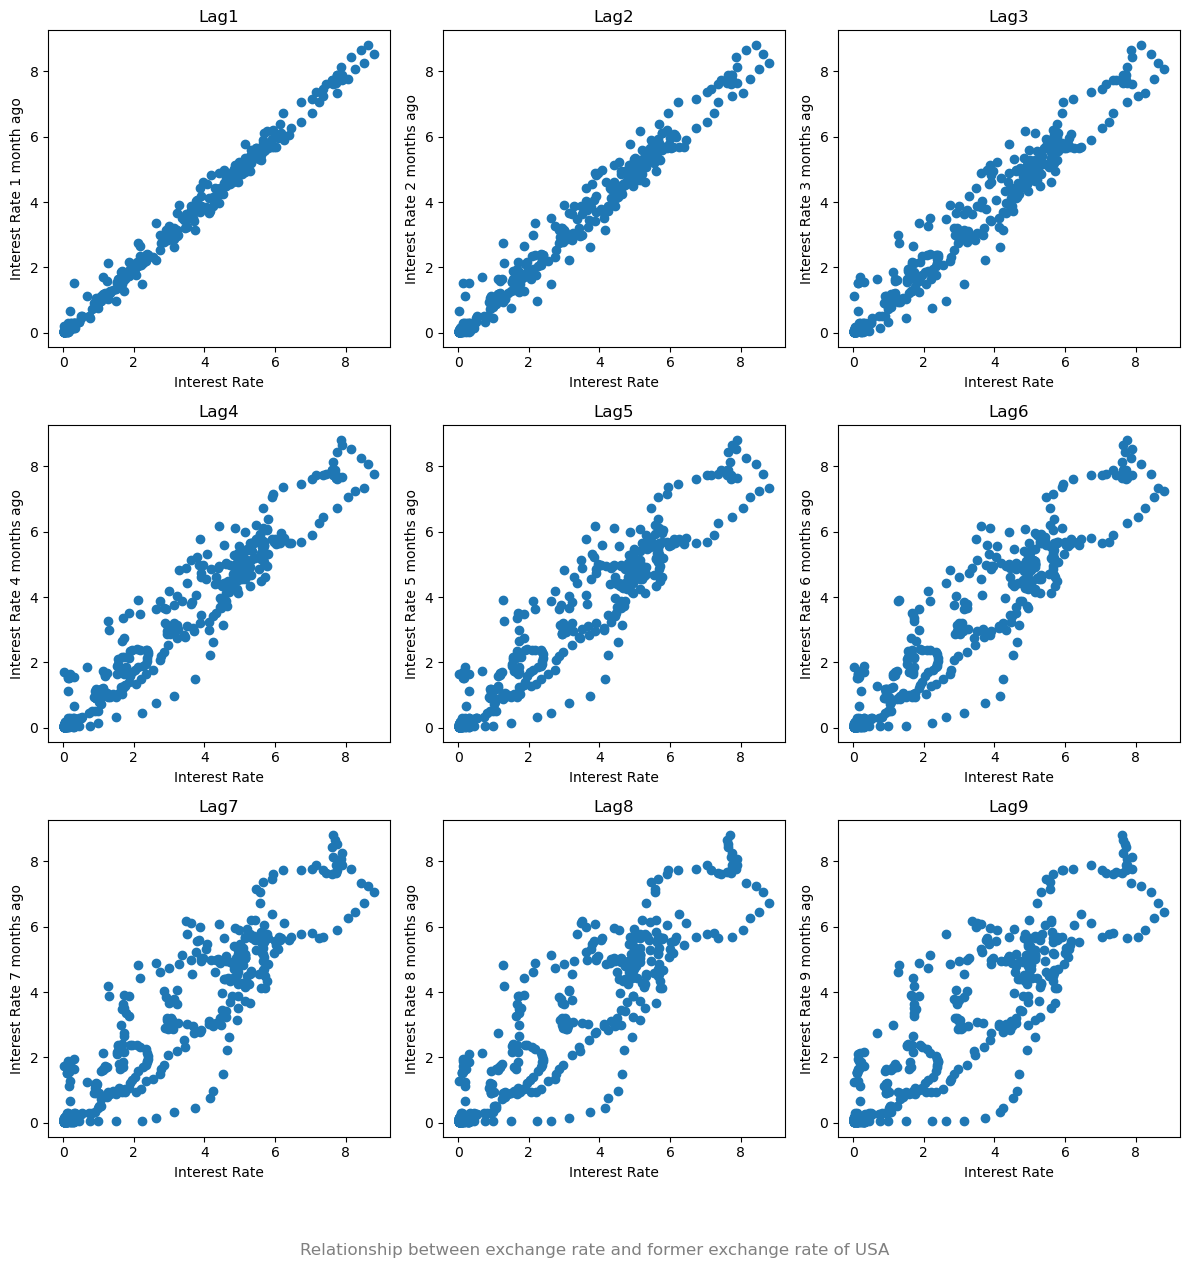

In [511]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['R1'],df87['R1Lag1'])
axes[0,0].set_xlabel('Interest Rate')
axes[0,0].set_ylabel('Interest Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['R1'],df87['R1Lag2'])
axes[0,1].set_xlabel('Interest Rate')
axes[0,1].set_ylabel('Interest Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['R1'],df87['R1Lag3'])
axes[0,2].set_xlabel('Interest Rate')
axes[0,2].set_ylabel('Interest Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['R1'],df87['R1Lag4'])
axes[1,0].set_xlabel('Interest Rate')
axes[1,0].set_ylabel('Interest Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['R1'],df87['R1Lag5'])
axes[1,1].set_xlabel('Interest Rate')
axes[1,1].set_ylabel('Interest Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['R1'],df87['R1Lag6'])
axes[1,2].set_xlabel('Interest Rate')
axes[1,2].set_ylabel('Interest Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['R1'],df87['R1Lag7'])
axes[2,0].set_xlabel('Interest Rate')
axes[2,0].set_ylabel('Interest Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['R1'],df87['R1Lag8'])
axes[2,1].set_xlabel('Interest Rate')
axes[2,1].set_ylabel('Interest Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['R1'],df87['R1Lag9'])
axes[2,2].set_xlabel('Interest Rate')
axes[2,2].set_ylabel('Interest Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate of USA"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate of USA')

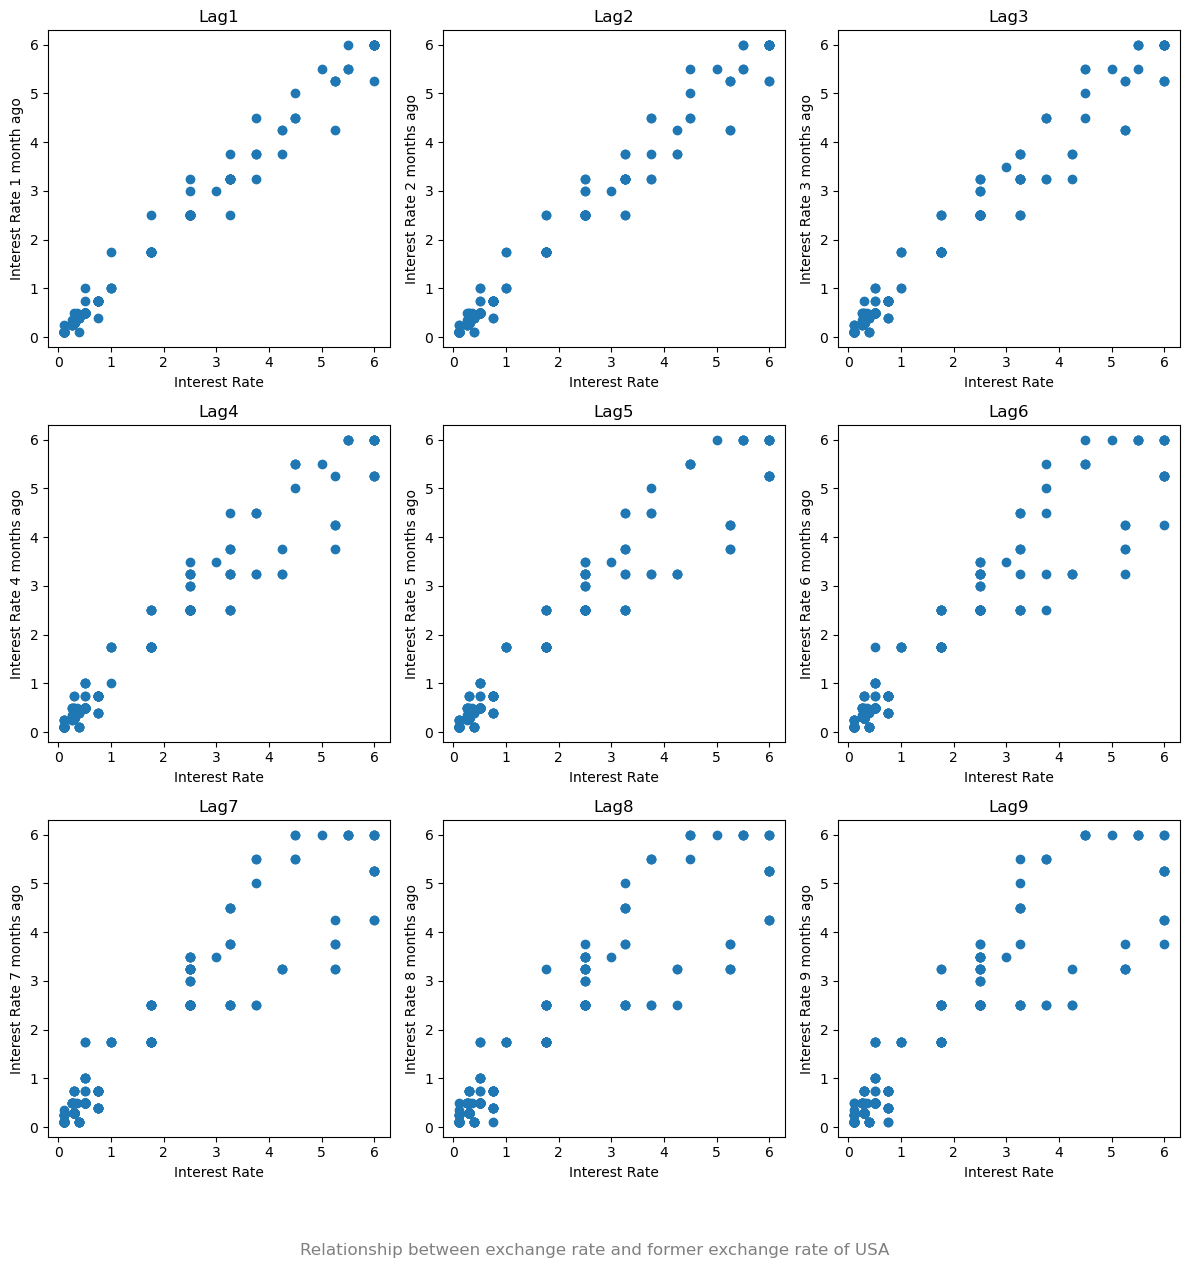

In [512]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#plot BMI
axes[0,0].scatter(df87['R2'],df87['R2Lag1'])
axes[0,0].set_xlabel('Interest Rate')
axes[0,0].set_ylabel('Interest Rate 1 month ago')
axes[0,0].set_title('Lag1')

#plot BP
axes[0,1].scatter(df87['R2'],df87['R2Lag2'])
axes[0,1].set_xlabel('Interest Rate')
axes[0,1].set_ylabel('Interest Rate 2 months ago')
axes[0,1].set_title('Lag2')

#plot S1
axes[0,2].scatter(df87['R2'],df87['R2Lag3'])
axes[0,2].set_xlabel('Interest Rate')
axes[0,2].set_ylabel('Interest Rate 3 months ago')
axes[0,2].set_title('Lag3')

#plot S2
axes[1,0].scatter(df87['R2'],df87['R2Lag4'])
axes[1,0].set_xlabel('Interest Rate')
axes[1,0].set_ylabel('Interest Rate 4 months ago')
axes[1,0].set_title('Lag4')

#plot S3
axes[1,1].scatter(df87['R2'],df87['R2Lag5'])
axes[1,1].set_xlabel('Interest Rate')
axes[1,1].set_ylabel('Interest Rate 5 months ago')
axes[1,1].set_title('Lag5')

#plot s4
axes[1,2].scatter(df87['R2'],df87['R2Lag6'])
axes[1,2].set_xlabel('Interest Rate')
axes[1,2].set_ylabel('Interest Rate 6 months ago')
axes[1,2].set_title('Lag6')

#plot s5
axes[2,0].scatter(df87['R2'],df87['R2Lag7'])
axes[2,0].set_xlabel('Interest Rate')
axes[2,0].set_ylabel('Interest Rate 7 months ago')
axes[2,0].set_title('Lag7')

#plot s6
axes[2,1].scatter(df87['R2'],df87['R2Lag8'])
axes[2,1].set_xlabel('Interest Rate')
axes[2,1].set_ylabel('Interest Rate 8 months ago')
axes[2,1].set_title('Lag8')

#plot s6
axes[2,2].scatter(df87['R2'],df87['R2Lag9'])
axes[2,2].set_xlabel('Interest Rate')
axes[2,2].set_ylabel('Interest Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate of USA"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


In [569]:
#split data
df87['year'] = pd.to_datetime(df87.date).dt.year #create a time index 'year'
print(df87.head())

            date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
year                                                                         
1987  1987-01-01  154.8295  162.05  162.85  156.47  154.73  154.18  158.61   
1987  1987-02-01  153.4068  154.83  162.05  162.85  156.47  154.73  154.18   
1987  1987-03-01  151.4332  153.41  154.83  162.05  162.85  156.47  154.73   
1987  1987-04-01  142.8986  151.43  153.41  154.83  162.05  162.85  156.47   
1987  1987-05-01  140.4790  142.90  151.43  153.41  154.83  162.05  162.85   

      ExLag7  ExLag8  ...  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  R2Lag7  \
year                  ...                                                   
1987  167.54  167.03  ...     3.0     3.5     3.5     3.5     3.5     3.5   
1987  158.61  167.54  ...     3.0     3.0     3.5     3.5     3.5     3.5   
1987  154.18  158.61  ...     3.0     3.0     3.0     3.5     3.5     3.5   
1987  154.73  154.18  ...     2.5     3.0     3.0     3.0     3.5   


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [570]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

df87.set_index('year', inplace=True)
df87.sort_index(inplace=True)
X = df87.drop(labels=['Ex'], axis=1)
y = df87['Ex']

for train_index, test_index in tss.split(X):
    X_other, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_other, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_other.index)
print("X_test:", X_test.index)
print(len(X_test))

Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year', length=353)
X_test: Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023],
      dtype='int32', name='year')
88


In [571]:
for train_index, test_index in tss.split(X_other):
    X_train, X_val = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

print("X_train:",X_train.index)
print("X_val:", X_val.index)
print(len(X_val))

X_train: Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='year', length=283)
X_val: Index([2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year')
70


<Axes: xlabel='year'>

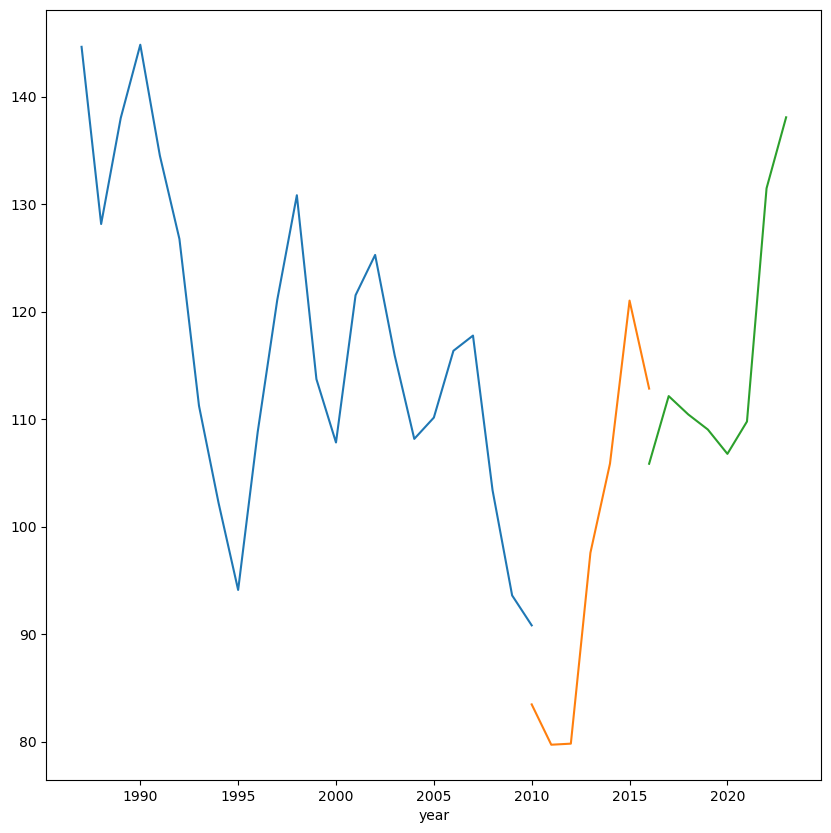

In [572]:
plt.figure(figsize = (10,10))
y_train.groupby('year').mean().plot()
y_val.groupby('year').mean().plot()
y_test.groupby('year').mean().plot()

In [573]:
X_train = X_train.drop(columns=['date'])
print(X_train.head())
X_val = X_val.drop(columns=['date'])
print(X_val.head())
X_test = X_test.drop(columns=['date'])
print(X_test.head())

      ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  ExLag7  ExLag8  ExLag9  \
year                                                                           
1987  162.05  162.85  156.47  154.73  154.18  158.61  167.54  167.03  175.09   
1987  154.83  162.05  162.85  156.47  154.73  154.18  158.61  167.54  167.03   
1987  153.41  154.83  162.05  162.85  156.47  154.73  154.18  158.61  167.54   
1987  151.43  153.41  154.83  162.05  162.85  156.47  154.73  154.18  158.61   
1987  142.90  151.43  153.41  154.83  162.05  162.85  156.47  154.73  154.18   

      ExLag10  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  R2Lag7  \
year           ...                                                           
1987   178.69  ...     3.0     3.0     3.5     3.5     3.5     3.5     3.5   
1987   175.09  ...     3.0     3.0     3.0     3.5     3.5     3.5     3.5   
1987   167.03  ...     2.5     3.0     3.0     3.0     3.5     3.5     3.5   
1987   167.54  ...     2.5     2.5     3.0     3.

In [574]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

std_ftrs = ['ExLag1','ExLag2','ExLag3','ExLag4','ExLag5','ExLag6','ExLag7','ExLag8','ExLag9','ExLag10','R1','R1Lag1','R1Lag2','R1Lag3','R1Lag4','R1Lag5','R1Lag6','R1Lag7','R1Lag8','R1Lag9','R1Lag10','R2','R2Lag1','R2Lag2','R2Lag3','R2Lag4','R2Lag5','R2Lag6','R2Lag7','R2Lag8','R2Lag9','R2Lag10']

#collect all the encoders
preprocessor = ColumnTransformer(
    transformers = [('std', StandardScaler(), std_ftrs)])


clf = Pipeline(steps = [('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)



(283, 32)
(283, 32)


In [575]:
#handle missing value with linear regression
feature_names = preprocessor.get_feature_names_out()

df_train_prep = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

df_val_prep = pd.DataFrame(data = X_val_prep, columns = feature_names)
print(df_val_prep.shape)

df_test_prep = pd.DataFrame(data = X_test_prep, columns = feature_names)
print(df_test_prep.shape)


(283, 32)
(70, 32)
(88, 32)


In [576]:
print('data dimensions of train set:',df_train_prep.shape)
perc_missing_per_ftr = df_train_prep.isnull().sum(axis=0)/df_train_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train_prep.isnull().sum(axis=1)!=0)/df_train_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of train set: (283, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


In [577]:
print('data dimensions of train set:',df_val_prep.shape)
perc_missing_per_ftr = df_val_prep.isnull().sum(axis=0)/df_val_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train_prep.isnull().sum(axis=1)!=0)/df_val_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of train set: (70, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


In [668]:
print('data dimensions of test set:',df_test_prep.shape)
perc_missing_per_ftr = df_test_prep.isnull().sum(axis=0)/df_test_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_test_prep.isnull().sum(axis=1)!=0)/df_test_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of test set: (88, 32)
fraction of missing values in features:
std__R2         0.875
std__R2Lag1     0.875
std__R2Lag2     0.875
std__R2Lag3     0.875
std__R2Lag4     0.875
std__R2Lag5     0.875
std__R2Lag6     0.875
std__R2Lag7     0.875
std__R2Lag8     0.875
std__R2Lag9     0.875
std__R2Lag10    0.875
dtype: float64
fraction of points with missing values: 0.875


In [579]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# print(df_test_prep[['std__R2','std__R2Lag1','std__R2Lag2','std__R2Lag3','std__R2Lag4','std__R2Lag5','std__R2Lag6','std__R2Lag7','std__R2Lag8','std__R2Lag9','std__R2Lag10']].head())

#imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=42)
imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(df_test_prep)
df_test_imp = pd.DataFrame(data=X_impute, columns = df_test_prep.columns)

print('data dimensions of train set:',df_test_imp.shape)
perc_missing_per_ftr = df_test_imp.isnull().sum(axis=0)/df_test_imp.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_test_imp.isnull().sum(axis=1)!=0)/df_test_imp.shape[0]
print('fraction of points with missing values:',frac_missing)


data dimensions of train set: (88, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


In [676]:
# Ridge
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

nr_states = [0,1,2,3,4]
test_scores = np.zeros(nr_states)
final_models = []

train_rmse_score_ridge = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_score_ridge = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_scores_ridge = np.zeros(len(nr_states))
test_rmse_scores_ridge = np.zeros(len(nr_states))
base_rmse_test_ridge = []
base_rmse_val_ridge = []

# loop through the different random states
for i in nr_states:
    models = []
    print('---------------------------------------')
    print('randoms state '+str(i))

    alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {
        'regressor__alpha': alpha_values,
    }



    
    

    for p, params in enumerate(ParameterGrid(param_grid)):
        
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        # print(i)
        model = Ridge(alpha=params['regressor__alpha'], solver = 'saga' ,random_state=i, max_iter=10000)
        
        model.fit(X_train_prep,y_train) # fit the model
        models.append(model) # save it
        # print(models)
        # calculate train and validation accuracy scores
        y_train_pred = model.predict(X_train_prep)
        train_rmse_score_ridge[p] = mean_squared_error(y_train, y_train_pred, squared=False)
        y_val_pred = model.predict(X_val_prep)
        val_rmse_score_ridge[p] = mean_squared_error(y_val, y_val_pred, squared=False)
        print('   ', train_rmse_score_ridge[p],val_rmse_score_ridge[p])
    
    # print out model parameters that maximize validation accuracy
   
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_rmse_score_ridge)])
    print('corresponding validation score:',np.min(val_rmse_score_ridge))
    val_rmse_scores_ridge[i] = np.min(val_rmse_score_ridge)
    # collect and save the best model
    # print(models)
    
    final_models.append(models[np.argmin(val_rmse_score_ridge)])
    # calculate and save the test score
    # print(final_models)
    y_test_pred = final_models[-1].predict(df_test_imp)
    y_test_base = [np.mean(y_test_pred) ]* len(y_test_pred)
    base_rmse_test_ridge.append(mean_squared_error(y_test, y_test_base, squared = False))
    # print(final_models,'--------------')
    test_rmse_scores_ridge[i] = mean_squared_error(y_test, y_test_pred, squared=False)
    print('test score:',test_rmse_scores_ridge[i])
    # print('base test score:', base_rmse_test[-1])

---------------------------------------
randoms state 0
    {'regressor__alpha': 0.0001}
    2.6791231920826197 2.530976751422433
    {'regressor__alpha': 0.001}
    2.6791631237745297 2.531049409958225
    {'regressor__alpha': 0.01}
    2.6795079068799486 2.5320883108329073
    {'regressor__alpha': 0.1}
    2.683864194047314 2.5424378301095456
    {'regressor__alpha': 1}
    2.740943945266466 2.652358549535003
    {'regressor__alpha': 10}
    3.1778190253001943 3.5248837069113907
    {'regressor__alpha': 100}
    4.610802755123171 5.903565509694579
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.530976751422433
test score: 3.228984151953245
---------------------------------------
randoms state 1
    {'regressor__alpha': 0.0001}


X has feature names, but Ridge was fitted without feature names


    2.6791485970018636 2.5309811945973353
    {'regressor__alpha': 0.001}
    2.679193634452735 2.5310550416071704
    {'regressor__alpha': 0.01}
    2.6795305125379922 2.5320449079545457
    {'regressor__alpha': 0.1}
    2.683924552136086 2.5424344439257034
    {'regressor__alpha': 1}
    2.7409563000437243 2.6523629933496506
    {'regressor__alpha': 10}
    3.177773685799666 3.524913345588135
    {'regressor__alpha': 100}
    4.610891746938177 5.903666395762807
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.5309811945973353
test score: 3.2291618791046406
---------------------------------------
randoms state 2
    {'regressor__alpha': 0.0001}


X has feature names, but Ridge was fitted without feature names


    2.67914418806682 2.530970869074987
    {'regressor__alpha': 0.001}
    2.679179453450541 2.531025986344815
    {'regressor__alpha': 0.01}
    2.679513750260733 2.5320661073485744
    {'regressor__alpha': 0.1}
    2.683866861254301 2.5424335262709117
    {'regressor__alpha': 1}
    2.740901858987117 2.6523481765747916
    {'regressor__alpha': 10}
    3.1778750282870276 3.5250078980417796
    {'regressor__alpha': 100}
    4.6108158848618475 5.903711446683468
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.530970869074987
test score: 3.2291170664840303
---------------------------------------
randoms state 3
    {'regressor__alpha': 0.0001}


X has feature names, but Ridge was fitted without feature names


    2.6791341756866487 2.5309859460044
    {'regressor__alpha': 0.001}
    2.679169630811689 2.531094418391896
    {'regressor__alpha': 0.01}
    2.67953221569699 2.5321197580662136
    {'regressor__alpha': 0.1}
    2.6838781857551117 2.5424365134148585
    {'regressor__alpha': 1}
    2.740881051106826 2.6524000219286332
    {'regressor__alpha': 10}
    3.1779063421193663 3.5250094222392314
    {'regressor__alpha': 100}
    4.6108223241406305 5.9036302634617535
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.5309859460044
test score: 3.229229736208025
---------------------------------------
randoms state 4
    {'regressor__alpha': 0.0001}


X has feature names, but Ridge was fitted without feature names


    2.679140449613439 2.530940865002608
    {'regressor__alpha': 0.001}
    2.6791757941798995 2.5310648312092185
    {'regressor__alpha': 0.01}
    2.6795162056720256 2.5321230025434014
    {'regressor__alpha': 0.1}
    2.683858860018288 2.542469640765638
    {'regressor__alpha': 1}
    2.7409631639285066 2.6523255045521554
    {'regressor__alpha': 10}
    3.177776851843602 3.5249339893570335
    {'regressor__alpha': 100}
    4.610790970125824 5.903484635274633
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.530940865002608
test score: 3.228966838571304


X has feature names, but Ridge was fitted without feature names


In [603]:
print(val_rmse_scores_ridge)
print(test_rmse_scores_ridge)
mean_val_rmse_for_ridge = np.mean(val_rmse_scores_ridge)
std_val_rmse_for_ridge = np.std(val_rmse_scores_ridge)
mean_test_rmse_for_ridge = np.mean(test_rmse_scores_ridge)
std_test_rmse_for_ridge = np.std(test_rmse_scores_ridge)
base_rmse_for_ridge = np.mean(base_rmse_test_ridge)

global_scores = test_rmse_scores_ridge
print(base_rmse_test_ridge)
print('Ridge mean = ',mean_test_rmse_for_ridge)
print('Ridge std = ', std_test_rmse_for_ridge)
print('Ridge base mean = ', base_rmse_for_ridge)
print('----global:', global_scores)

[2.53097675 2.53098119 2.53097087 2.53098595 2.53094087]
[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
[12.069905547783618, 12.069956349294937, 12.06996043314811, 12.069936685722498, 12.06988307887039]
Ridge mean =  3.229091934464249
Ridge std =  0.00010176369080907504
Ridge base mean =  12.06992841896391
----global: [3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]


In [671]:
print(final_models)

[Ridge(alpha=0.0001, max_iter=10000, random_state=0, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=1, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=2, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=3, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=4, solver='saga')]


In [604]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# import shap

# np.random.seed(42)
# X = np.random.rand(1000, 3)
# y = 2 * X[:, 0] + 3 * X[:, 1] - 5 * X[:, 2] + np.random.normal(0, 0.1, 1000)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# alpha = 1.0
# model = Ridge(alpha=alpha)
# model.fit(X_train, y_train)

# explainer = shap.LinearExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

# # global feature importance
# shap.summary_plot(shap_values, X_test, feature_names=['Feature 1', 'Feature 2', 'Feature 3'],plot_type = 'dot')

# # local feature importance
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_test[0, :], feature_names=['Feature 1', 'Feature 2', 'Feature 3'])

In [605]:
# Lasso
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

nr_states = [0,1,2,3,4]
test_scores = np.zeros(nr_states)
final_models = []

train_rmse_score = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_score = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_scores = np.zeros(len(nr_states))
test_rmse_scores = np.zeros(len(nr_states))
base_rmse_test_lasso = []
base_rmse_val = []

# loop through the different random states
for i in nr_states:
    models = []
    print('---------------------------------------')
    print('randoms state '+str(i))

    alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {
        'regressor__alpha': alpha_values,
    }



    
    

    for p, params in enumerate(ParameterGrid(param_grid)):
        
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        # print(i)
        model = Lasso(alpha=params['regressor__alpha'], selection = 'random', random_state=i, max_iter=10000)


        model.fit(X_train_prep,y_train) # fit the model
        models.append(model) # save it
        # print(models)
        # calculate train and validation accuracy scores
        y_train_pred = model.predict(X_train_prep)
        train_rmse_score[p] = mean_squared_error(y_train, y_train_pred, squared=False)
        y_val_pred = model.predict(X_val_prep)
        val_rmse_score[p] = mean_squared_error(y_val, y_val_pred, squared=False)
        print('   ', train_rmse_score[p],val_rmse_score[p])
    
    # print out model parameters that maximize validation accuracy
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_rmse_score)])
    print('corresponding validation score:',np.min(val_rmse_score))
    val_rmse_scores[i] = np.min(val_rmse_score)
    # collect and save the best model
    # print(models)
    final_models.append(models[np.argmin(val_rmse_score)])
    # calculate and save the test score
    print(final_models,'--------------')
    y_test_pred = final_models[-1].predict(df_test_imp)
    y_test_base = [np.mean(y_test_pred) ]* len(y_test_pred)
    base_rmse_test_lasso.append(mean_squared_error(y_test, y_test_base, squared = False))
    
    test_rmse_scores[i] = mean_squared_error(y_test, y_test_pred, squared=False)
    print('test score:',test_rmse_scores[i])
    print('base test score:', base_rmse_test[-1])

---------------------------------------
randoms state 0
    {'regressor__alpha': 0.0001}
    2.6769066949231917 2.5307036722391953
    {'regressor__alpha': 0.001}
    2.679057025183229 2.5324720513366232
    {'regressor__alpha': 0.01}
    2.7392702286435533 2.5272597046050667
    {'regressor__alpha': 0.1}
    3.0523307216022144 2.6922933340918886
    {'regressor__alpha': 1}
    3.3090935294175736 2.9134058409288595
    {'regressor__alpha': 10}
    10.50186339670171 17.434574378498294
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.5272597046050667
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random')] --------------
test score: 3.157118768228965
base test score: 12.06988307887039
---------------------------------------
randoms state 1
    {'regressor__alpha': 0.0001}


X has feature names, but Lasso was fitted without feature names


    2.6769067209084647 2.530698569422554
    {'regressor__alpha': 0.001}
    2.6790846213986823 2.53229969125205
    {'regressor__alpha': 0.01}
    2.7394417361345216 2.5275944731962827
    {'regressor__alpha': 0.1}
    3.051768123040001 2.6846383763129413
    {'regressor__alpha': 1}
    3.3183033945266858 2.9247292876617643
    {'regressor__alpha': 10}
    10.50186339670171 17.434574378498294
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.5275944731962827
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=1, selection='random')] --------------
test score: 3.159224878270173
base test score: 12.06988307887039
---------------------------------------
randoms state 2
    {'regressor__alpha': 0.0001}


X has feature names, but Lasso was fitted without feature names


    2.676906381382544 2.530687623104557
    {'regressor__alpha': 0.001}
    2.6790919407200637 2.532372601795432
    {'regressor__alpha': 0.01}
    2.7379953911043646 2.525976229235955
    {'regressor__alpha': 0.1}
    3.0510423356510383 2.6843549017769743
    {'regressor__alpha': 1}
    3.3101059996727984 2.912500833848787
    {'regressor__alpha': 10}
    10.501863396701713 17.4345743784983
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.525976229235955
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=1, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=2, selection='random')] --------------


X has feature names, but Lasso was fitted without feature names


test score: 3.146237515970553
base test score: 12.06988307887039
---------------------------------------
randoms state 3
    {'regressor__alpha': 0.0001}
    2.6769065792514617 2.5306902818498282
    {'regressor__alpha': 0.001}
    2.6790992404437417 2.532376190183773
    {'regressor__alpha': 0.01}
    2.739246489921093 2.5266791000666617
    {'regressor__alpha': 0.1}
    3.0512147757418147 2.6822947572427074
    {'regressor__alpha': 1}
    3.3103534377318415 2.912697693053465
    {'regressor__alpha': 10}
    10.50186339670171 17.434574378498294
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.5266791000666617
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=1, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=2, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=3, selection='r

X has feature names, but Lasso was fitted without feature names


test score: 3.151662019364847
base test score: 12.06988307887039
---------------------------------------
randoms state 4
    {'regressor__alpha': 0.0001}
    2.6769066778383506 2.53069460627271
    {'regressor__alpha': 0.001}
    2.6790680716410686 2.532296846405596
    {'regressor__alpha': 0.01}
    2.7399925977627575 2.5272925960775043
    {'regressor__alpha': 0.1}
    3.0516276082183666 2.687215723440718
    {'regressor__alpha': 1}
    3.317415933258838 2.924092849832655
    {'regressor__alpha': 10}
    10.50186339670171 17.434574378498294
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.5272925960775043
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=1, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=2, selection='random'), Lasso(alpha=0.01, max_iter=10000, random_state=3, selection='rand

X has feature names, but Lasso was fitted without feature names


In [606]:
print(val_rmse_scores)
print(test_rmse_scores)
mean_val_rmse_for_lasso = np.mean(val_rmse_scores)
std_val_rmse_for_lasso = np.std(val_rmse_scores)
mean_test_rmse_for_lasso = np.mean(test_rmse_scores)
std_test_rmse_for_lasso = np.std(test_rmse_scores)
scores_lasso = []

global_scores = np.vstack((global_scores, test_rmse_scores))

print('lasso rmse mean for test set = ',mean_test_rmse_for_lasso)
print('lasso rmse std for test set = ', std_test_rmse_for_lasso)
base_rmse_for_lasso = np.mean(base_rmse_test_lasso)
print(base_rmse_test)
print('Lasso base mean = ', base_rmse_for_lasso)
print(global_scores)

[2.5272597  2.52759447 2.52597623 2.5266791  2.5272926 ]
[3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
lasso rmse mean for test set =  3.15453307867768
lasso rmse std for test set =  0.004916980183120864
[12.069905547783618, 12.069956349294937, 12.06996043314811, 12.069936685722498, 12.06988307887039]
Lasso base mean =  12.058298551236643
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


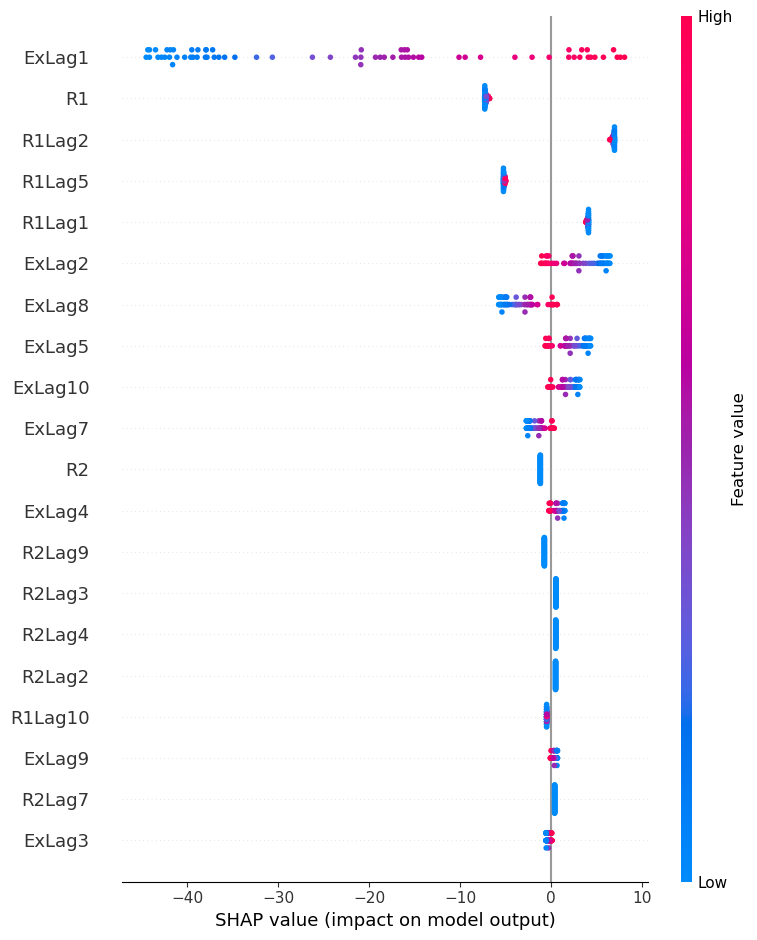

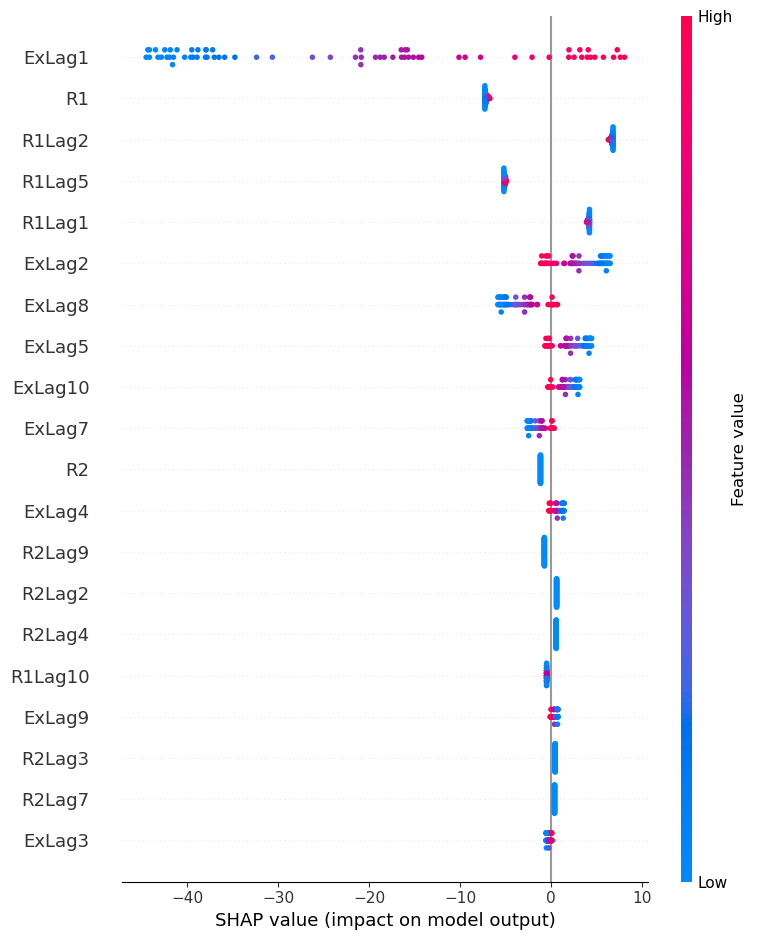

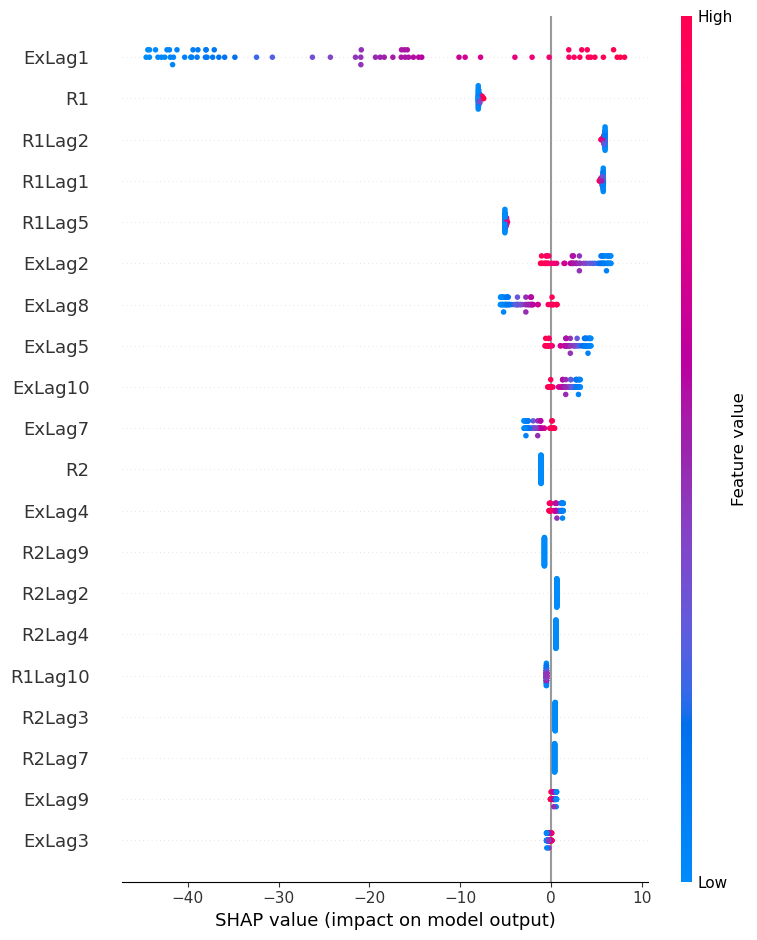

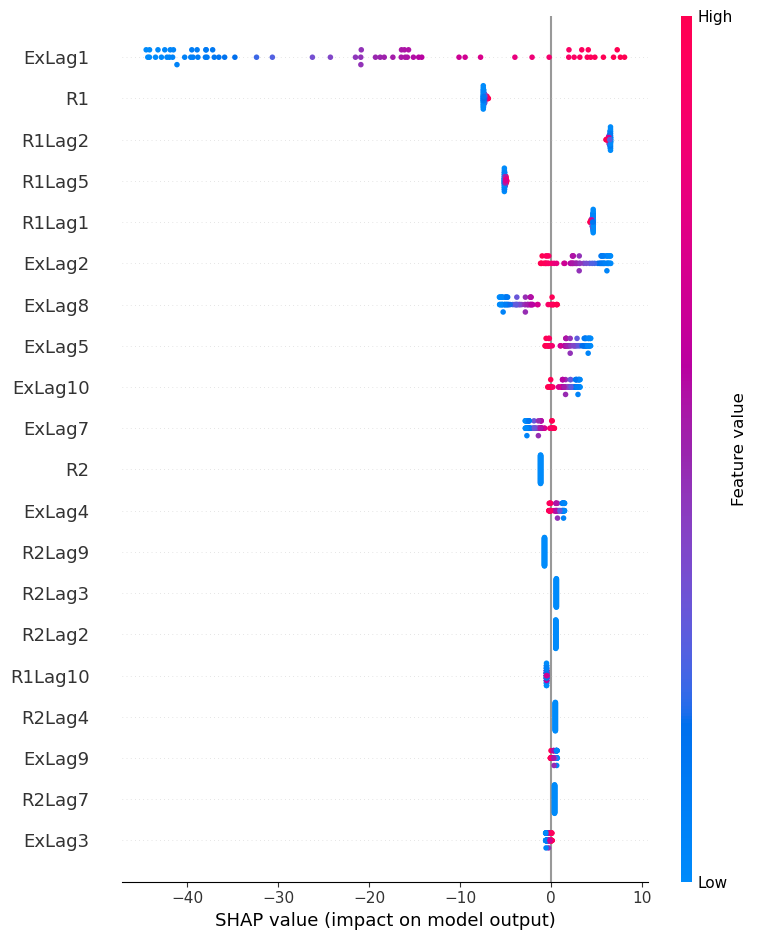

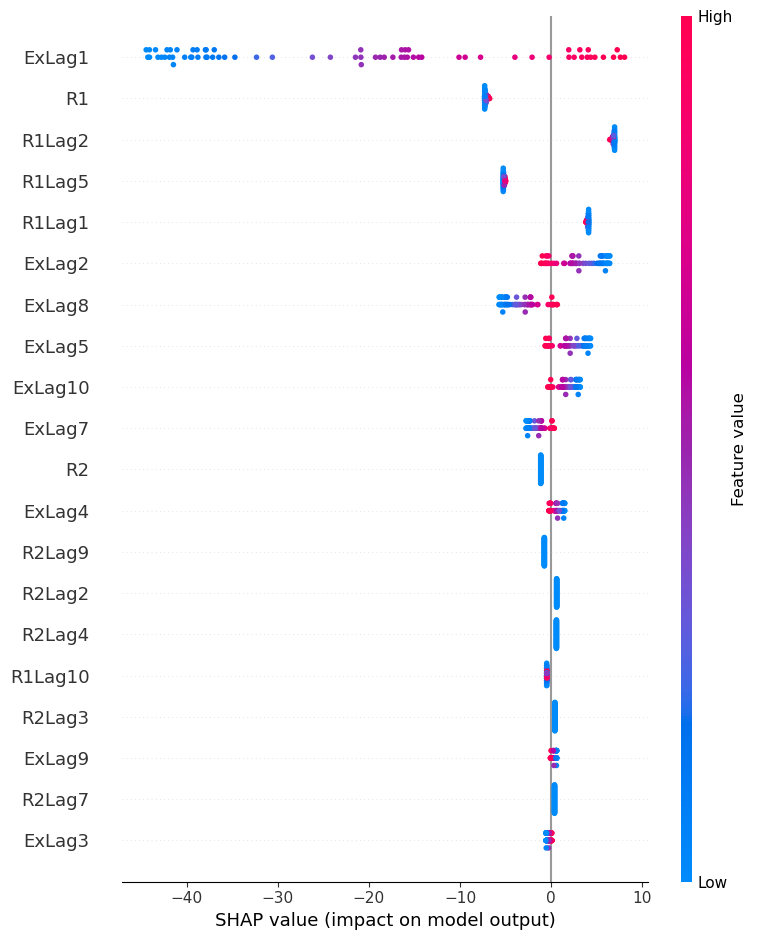

In [601]:
# model = Ridge(alpha=params['regressor__alpha'], solver = 'saga' ,random_state=0, max_iter=10000)
for i in nr_states:        
# model.fit(X_train_prep,y_train)
    explainer = shap.LinearExplainer(final_models[i],X_train_prep)
    # Calculate SHAP values for the selected data points
    shap_values = explainer.shap_values(X_val_prep)
    
    shap.summary_plot(shap_values, X_val_prep, feature_names=X_val.columns) #,plot_type = 'dot'


In [677]:
#XGBoost
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    "missing": [np.nan], 
    'n_estimators': [50, 100, 200], 
    
}

# Lists to store results
val_rmses = []
train_rmses = []
test_rmses = []
best_models = []
test_sets = []

# Step 6: Random State Variation and Step 7: Save Scores
random_states = [0]  # Adjust as needed
for random_state in random_states:
    

    # Fit the XGB model using GridSearchCV
    grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train_prep, y_train, eval_metric="logloss", eval_set=[(X_val_prep, y_val)], early_stopping_rounds=10, verbose=False)


    # Save the best model
    best_models.append(grid_search.best_estimator_)

    # Save the test set
    test_sets.append({'X_test': pd.DataFrame(X_test, columns=X.columns), 'y_test': pd.Series(y_test)})

    # Evaluate the model
    y_pred_train = grid_search.predict(X_train_prep)
    y_pred_test = grid_search.predict(X_test_prep)
    y_pred_val = grid_search.predict(X_val_prep)
    val_rmse = mean_squared_error(y_val, y_pred_val, squared = False)
    val_rmses.append(val_rmse)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared = False)
    train_rmses.append(train_rmse)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared= False)
    test_rmses.append(test_rmse)

# # Save the best models
# for i, model in enumerate(best_models):
#     joblib.dump(model, f'xgb_model_random_state_{random_states[i]}.joblib')

# # Save the test sets
# for i, test_set in enumerate(test_sets):
#     test_set['X_test'].to_csv(f'test_set_X_random_state_{random_states[i]}.csv', index=False)
#     test_set['y_test'].to_csv(f'test_set_y_random_state_{random_states[i]}.csv', index=False)

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
`eval_metric` in `fit` method is deprecated for better compatibility w

In [678]:
print(best_models)

[XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)]


In [609]:
from itertools import repeat
base = np.mean(grid_search.predict(X_test_prep))

bases = [base]*len(X_test_prep)
base_score = mean_squared_error(y_test, bases,squared = False)
print(train_rmses)
print('--------------------')
print(val_rmses)
print('--------------------')
print(test_rmses)
print('--------------------')
print(base_score)

test_rmse_scores = test_rmses*5
print(val_rmse_scores)




global_scores = np.vstack((global_scores, test_rmse_scores))
print(global_scores)

[0.6186844978789423]
--------------------
[7.827905216198524]
--------------------
[5.137030015211077]
--------------------
12.375296283796501
[7.827905216198524, 7.827905216198524, 7.827905216198524, 7.827905216198524, 7.827905216198524]
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]]


In [679]:
#RF
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
              'max_features': [None,1, 3, 10, 20], 
              'max_depth': [None,1, 3, 10, 20]
              } 

# Lists to store results
val_rmses = []
train_rmses = []
test_rmses = []
best_models = []
test_sets = []

# Step 6: Random State Variation and Step 7: Save Scores
random_states = [0,1,2,3,4]  # Adjust as needed
for random_state in random_states:
    

    # Fit the XGB model using GridSearchCV
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state = random_state), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train_prep, y_train)


    # Save the best model
    best_models.append(grid_search.best_estimator_)

    # Save the test set
    test_sets.append({'X_test': pd.DataFrame(X_test, columns=X.columns), 'y_test': pd.Series(y_test)})

    # Evaluate the model
    y_pred_train = grid_search.predict(X_train_prep)
    y_pred_test = grid_search.predict(df_test_imp)
    y_pred_val = grid_search.predict(X_val_prep)
    val_rmse = mean_squared_error(y_val, y_pred_val, squared = False)
    val_rmses.append(val_rmse)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared = False)
    train_rmses.append(train_rmse)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared= False)
    test_rmses.append(test_rmse)

# # Save the best models
# for i, model in enumerate(best_models):
#     joblib.dump(model, f'xgb_model_random_state_{random_states[i]}.joblib')

# # Save the test sets
# for i, test_set in enumerate(test_sets):
#     test_set['X_test'].to_csv(f'test_set_X_random_state_{random_states[i]}.csv', index=False)
#     test_set['y_test'].to_csv(f'test_set_y_random_state_{random_states[i]}.csv', index=False)

X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names


In [680]:
print(best_models)

[RandomForestRegressor(max_depth=3, max_features=None, random_state=0), RandomForestRegressor(max_features=None, random_state=1), RandomForestRegressor(max_depth=3, max_features=None, random_state=2), RandomForestRegressor(max_features=None, random_state=3), RandomForestRegressor(max_features=None, random_state=4)]


In [620]:
base = np.mean(grid_search.predict(df_test_imp))

bases = [base]*len(df_test_imp)
base_score = mean_squared_error(y_test, bases,squared = False)
print(train_rmses)
print('--------------------')
print(val_rmses)
print('--------------------')
print(test_rmses)
print('--------------------')
print(base_score)



global_scores = np.vstack((global_scores, test_rmses))
print(global_scores)

[2.984816471245954, 1.230707039386859, 2.9824762643107823, 1.2292946812753471, 1.21627873826274]
--------------------
[7.140165286926264, 7.217264358907613, 7.258064604554781, 7.1804726022492975, 7.0674968920155745]
--------------------
[2.900069128951297, 3.1880615726920496, 2.879131464171557, 3.223530188661483, 3.312585156749436]
--------------------
12.083703986992186
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]
 [3.31258516 3.31258516 3.31258516 3.31258516 3.31258516]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]]


X has feature names, but RandomForestRegressor was fitted without feature names


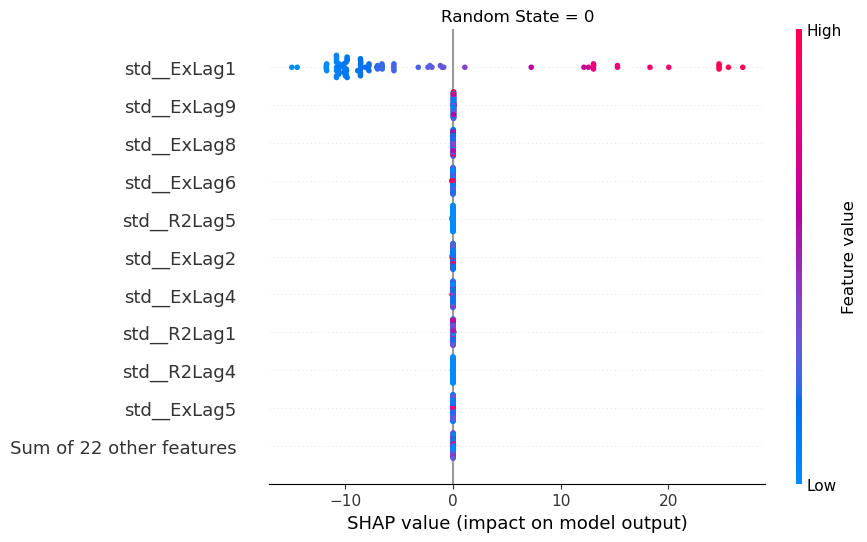

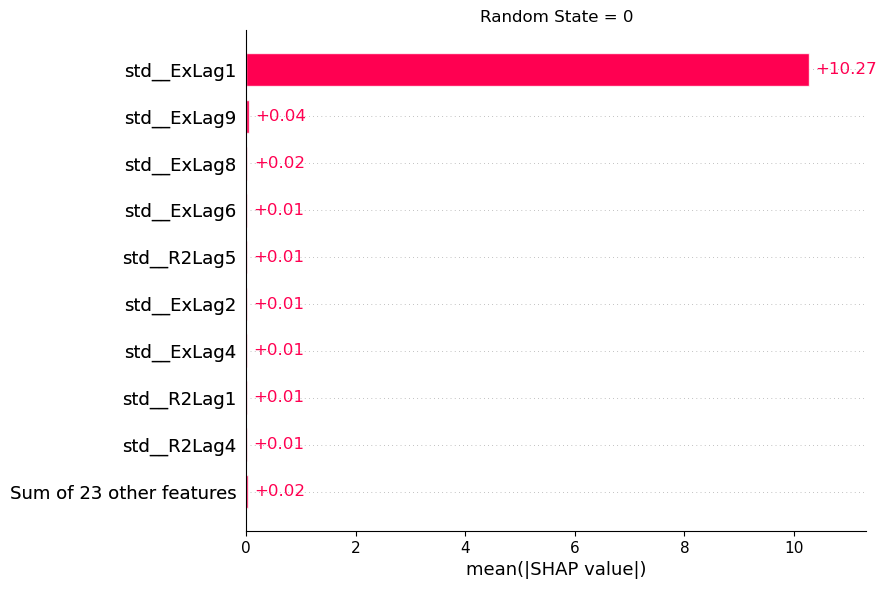

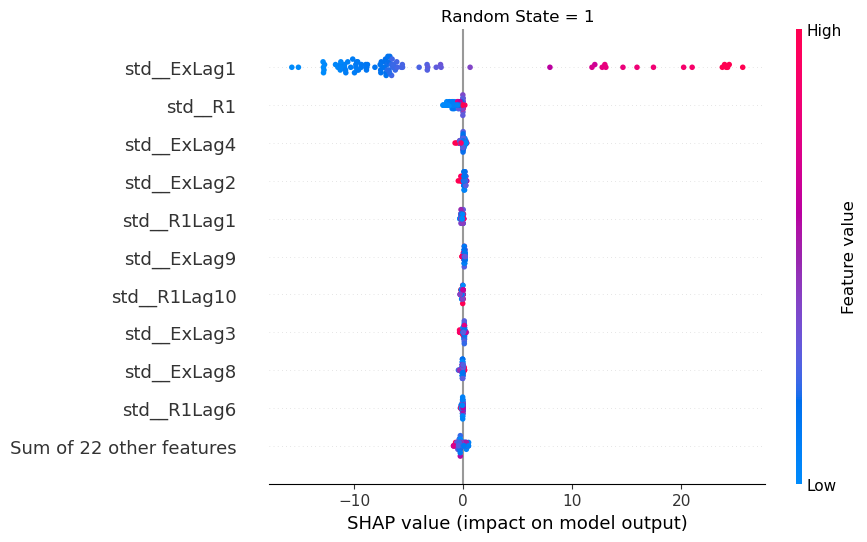

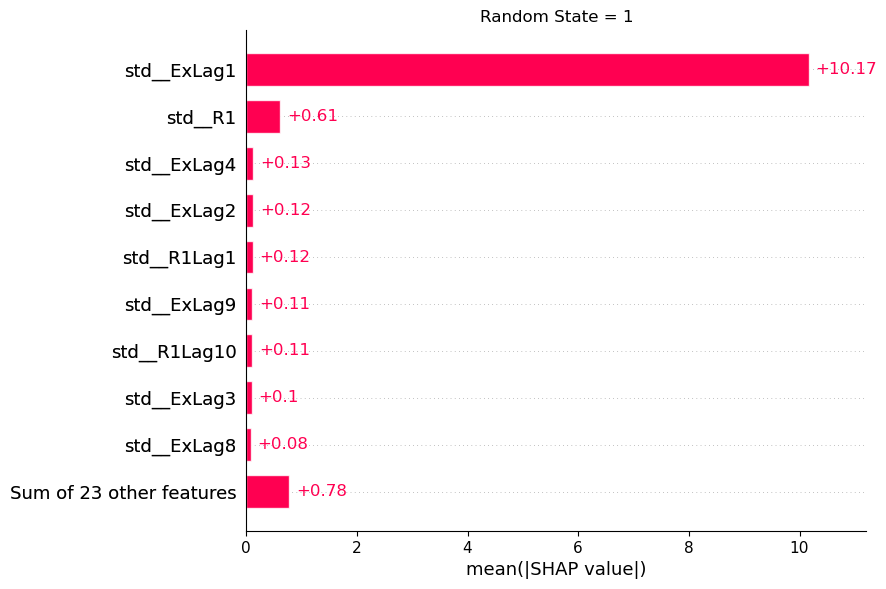

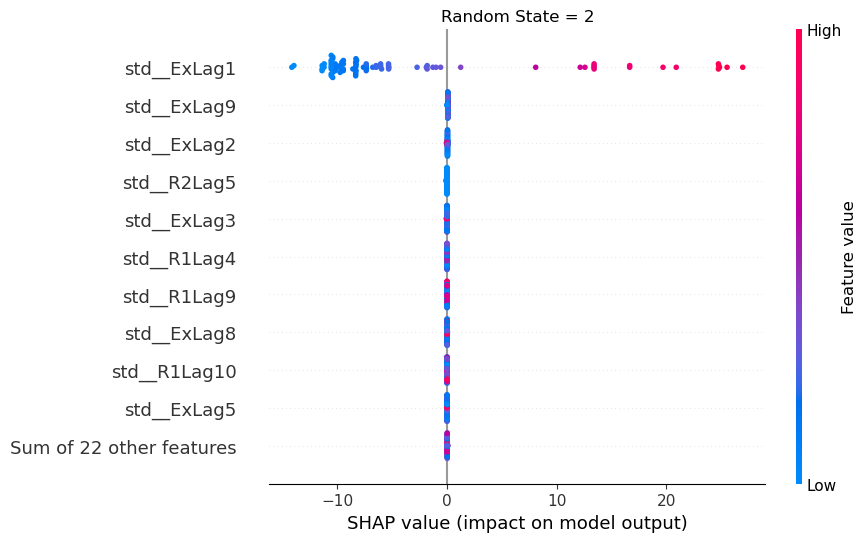

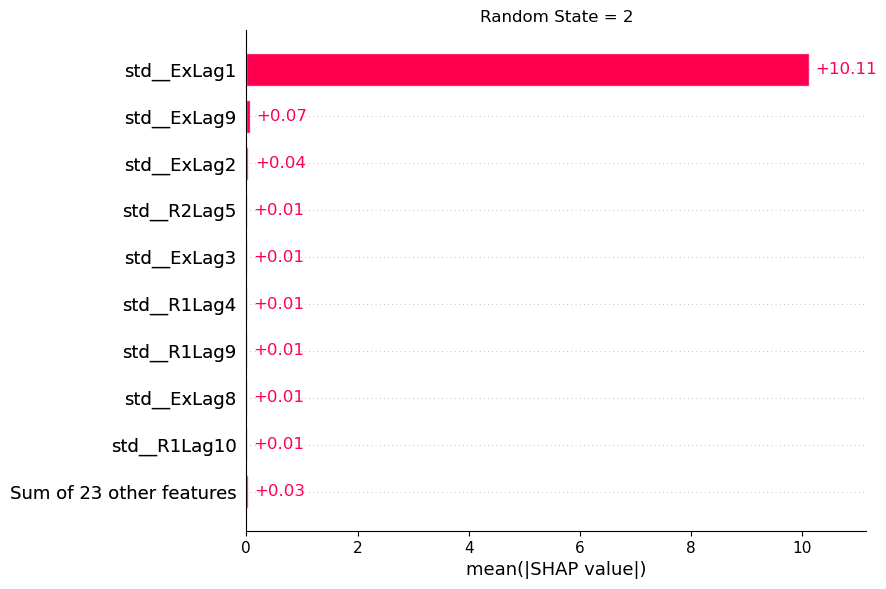

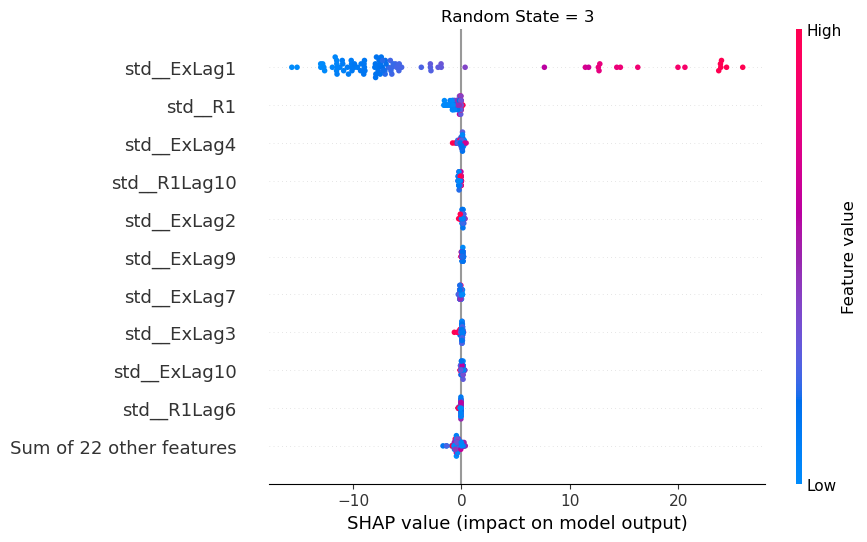

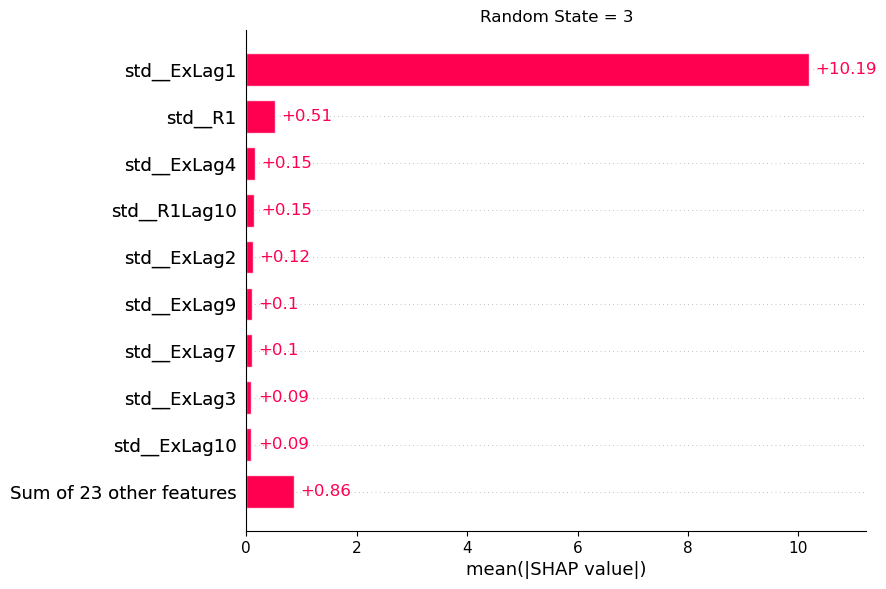

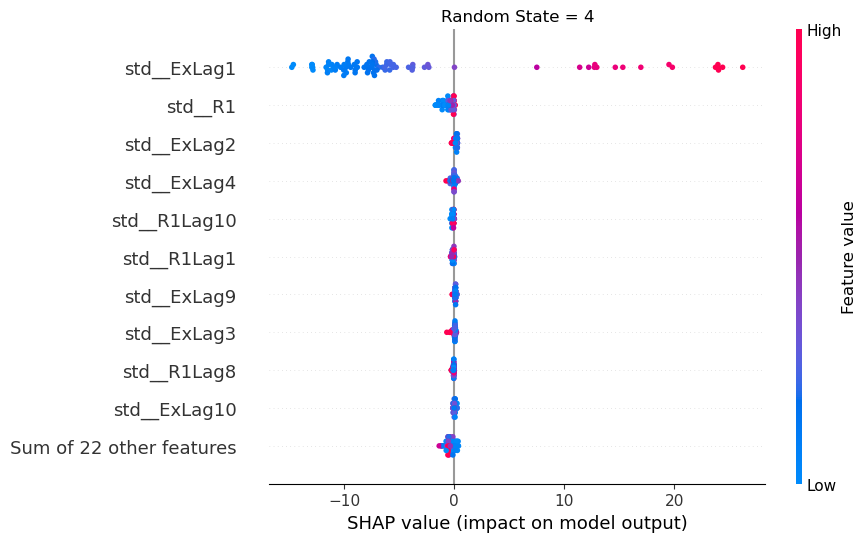

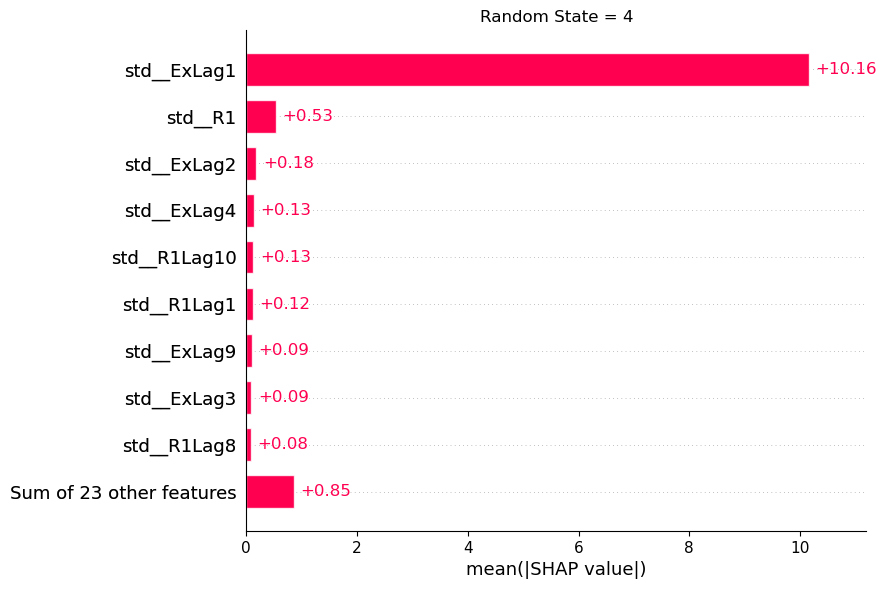

In [658]:
for i in [0,1,2,3,4]:
    explainer = shap.TreeExplainer(best_models[i])
    shap_values = explainer(df_test_imp)
    plt.title("Random State = {}".format(i))
    shap.plots.beeswarm(shap_values,  max_display=11, order=shap.Explanation.abs.mean(0),show=False)
    plt.savefig('figures/beeswarm plot of RF(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')
    plt.show()
    plt.title("Random State = {}".format(i))
    shap.plots.bar(shap_values.abs.mean(0),show=False)
    plt.savefig('D:/data1030/project/figures/bar plot of RF(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')

    plt.show()


In [656]:

data_points_indices = [0, 25, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
selected_data_points = df_test_imp.iloc[data_points_indices]

for p in [0,1,2,3,4]:
    explainer = shap.TreeExplainer(best_models[p])
# Calculate SHAP values for the selected data points
    shap_values = explainer.shap_values(selected_data_points)

# Create force plots for each data point
    for i in range(len(data_points_indices)):
        # Create a force plot for the i-th data point
        
        shap.force_plot(
            explainer.expected_value,
            shap_values[i],
            features = selected_data_points.iloc[i],
            feature_names=df_test_imp.columns,
            out_names=f"Prediction for data points with indice {data_points_indices[i]}(true value = {y_test.iloc[data_points_indices[i]]} JPY/USD(random state = {p})",
            matplotlib=True,
            text_rotation=15,
            show=False, 
            
        )
        
        plt.savefig('figures/indice {} (true value = {}) (random = {}).png'.format(data_points_indices[i], y_test.iloc[data_points_indices[i]], p), dpi=350, bbox_inches = 'tight')



year
2016    105.3509
2016    104.1910
2016    101.2383
2016    101.7843
2016    103.9075
          ...   
2023    137.0532
2023    141.3581
2023    140.9360
2023    144.7804
2023    147.8450
Name: Ex, Length: 88, dtype: float64


X has feature names, but RandomForestRegressor was fitted without feature names


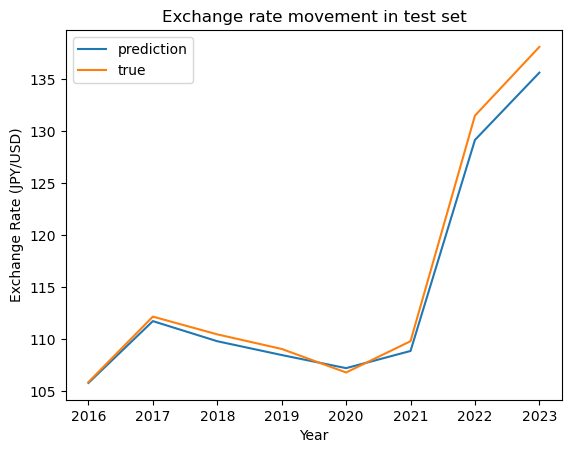

In [661]:
print(y_test)
col_name = y_test.index
df_y_pred = pd.DataFrame(best_models[0].predict(df_test_imp),col_name)





plt.plot(df_y_pred.groupby('year').mean(),label='prediction')
plt.plot(y_test.groupby('year').mean(),label='true')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Exchange Rate (JPY/USD)')
plt.title('Exchange rate movement in test set')

# Adding legend
plt.legend()

plt.savefig('figures/true vs prediction', dpi=350)
# Display the plot
plt.show()

In [684]:
from sklearn.neighbors import KNeighborsRegressor

nss = np.linspace(1, 250, 50).astype(int)
val_rmses = []
test_rmses = []
for n in nss:
    neigh = KNeighborsRegressor(n_neighbors = n,  weights = 'distance')
    neigh.fit(X_train_prep, y_train)
    y_pred = neigh.predict(X_val_prep)
    val_rmse = mean_squared_error(y_val, y_pred, squared = False)
    val_rmses.append(val_rmse)
    y_pred = neigh.predict(df_test_imp)
    test_rmse = mean_squared_error(y_test, y_pred, squared = False)
    test_rmses.append(test_rmse)





X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without feature names
X has feature names, but KNeighborsRegressor was fitted without 

In [685]:
best_val = val_rmses[np.argmin(val_rmses)]
best_test = test_rmses[np.argmin(val_rmses)]
best_neigh = nss[np.argmin(val_rmses)]

# print(val_rmses)
# print(test_rmses)
print(best_val)
print(best_test)
print(best_neigh)

base = np.mean(neigh.predict(df_test_imp))
bases = [base]*len(df_test_imp)
base_score = mean_squared_error(y_test, bases,squared = False)
print(base_score)

test_rmses = [best_test]*5
print(test_rmses)
global_scores = np.vstack((global_scores, test_rmses))
print(global_scores)

9.417513871543504
9.770537196953168
1
12.32997003472518
[9.770537196953168, 9.770537196953168, 9.770537196953168, 9.770537196953168, 9.770537196953168]
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]
 [3.31258516 3.31258516 3.31258516 3.31258516 3.31258516]
 [3.31258516 3.31258516 3.31258516 3.31258516 3.31258516]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]]


X has feature names, but KNeighborsRegressor was fitted without feature names


In [591]:
# from sklearn.neighbors import KNeighborsRegressor

# nss = [5,10,20,50,100,200,250]
# val_rmses = []
# test_rmses = []
# for n in nss:
#     neigh = KNeighborsRegressor(n_neighbors = n)
#     neigh.fit(X_train_prep, y_train)
#     y_pred = neigh.predict(X_val_prep)
#     val_rmse = mean_squared_error(y_val, y_pred, squared = False)
#     val_rmses.append(val_rmse)
#     y_pred = neigh.predict(df_test_imp)
#     test_rmse = mean_squared_error(y_test, y_pred, squared = False)
#     test_rmses.append(test_rmse)

In [617]:
# print(val_rmses)
# print(test_rmses)
base = np.mean(y_test)
bases = [base]*len(y_test)
baseline = mean_squared_error(y_test, bases, squared = False)
print(baseline)

11.932031854798263


[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]
 [3.31258516 3.31258516 3.31258516 3.31258516 3.31258516]
 [3.31258516 3.31258516 3.31258516 3.31258516 3.31258516]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]]
      Ridge     Lasso  XGBoost        RF       KNN
0  3.228984  3.157119  5.13703  2.900069  9.770537
1  3.229162  3.159225  5.13703  3.188062  9.770537
2  3.229117  3.146238  5.13703  2.879131  9.770537
3  3.229230  3.151662  5.13703  3.223530  9.770537
4  3.228967  3.158422  5.13703  3.312585  9.770537


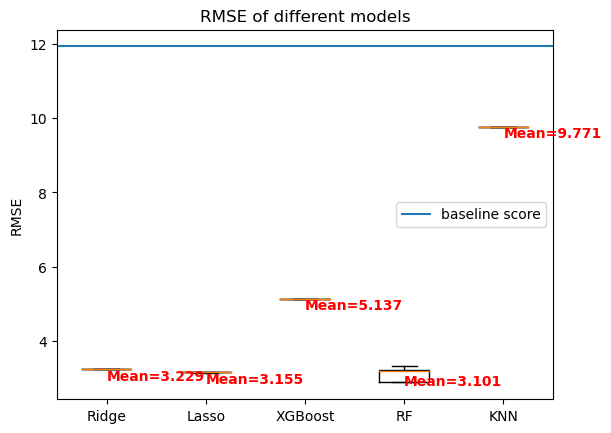

RF


In [687]:
import matplotlib.pyplot as plt
print(global_scores)
global_scores = global_scores[[0,1,2,3,6]]
df_global_scores = pd.DataFrame(global_scores.T, columns = ['Ridge','Lasso','XGBoost', 'RF', 'KNN'])
print(df_global_scores)
plt.boxplot(df_global_scores, labels = df_global_scores.columns)
means = np.mean(df_global_scores, axis=0)
for i, mean_value in enumerate(means):
    plt.text(i + 1, mean_value, f'Mean={mean_value:.3f}', ha='left', va='top', color='red', fontweight='bold')

plt.ylabel('RMSE')
plt.title('RMSE of different models')
plt.axhline(baseline,label='baseline score')
plt.legend()
plt.savefig('figures/RMSEs', dpi=350)

plt.show()
print(df_global_scores.columns[np.argmin(np.mean(df_global_scores, axis = 0))])